# What India thinks about Covishield and Covaxin: Twitter Sentiment Analysis

To kick start India's immunization programme, two vaccines have been given emergency approval for use in India - Covishield (Oxford/AstraZeneca vaccine) and Covaxin (Bharat Biotech domestic vaccine). 

Hence a perfect opportunity to utilize the Twitter API, natural language processing (NLP), and data visualization, and perform a basic sentiment analysis in Python to determine the general sentiment (positive, neutral, or negative) regarding the two vaccines.

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from langdetect import detect

In [2]:
#import credential file
login = pd.read_csv('/Users/uttkarshsingh/Desktop/twitter/Login.csv')

In [3]:
consumerKey = login['Key'][0]
consumerSecret = login['Key'][1]
accessToken = login['Key'][2]
accessTokenSecret = login['Key'][3]

In [4]:
#Create authenticate object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

authenticate.set_access_token(accessToken, accessTokenSecret)

#create API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
query = 'covishield'
max_tweets = 1000
results_covishield = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

query = 'covaxin'
results_covaxin = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [6]:
json_data = [r._json for r in results_covishield]
df_covishield = pd.json_normalize(json_data)

json_data = [r._json for r in results_covaxin]
df_covaxin = pd.json_normalize(json_data)

In [7]:
df_covishield.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.quoted_status.is_quote_status,retweeted_status.quoted_status.retweet_count,retweeted_status.quoted_status.favorite_count,retweeted_status.quoted_status.favorited,retweeted_status.quoted_status.retweeted,retweeted_status.quoted_status.possibly_sensitive,retweeted_status.quoted_status.lang,quoted_status.user.entities.url.urls,quoted_status.entities.media,quoted_status.extended_entities.media
0,Sun Jan 17 18:21:20 +0000 2021,1350870840477315081,1350870840477315081,*- India's own vaccine Covishield was develop...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jan 17 18:21:09 +0000 2021,1350870793643765765,1350870793643765765,@crisvector pior! \n\nIsso me lembrou uma dúv...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.350869e+18,1350868599905398786,17984064.0,17984064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jan 17 18:20:58 +0000 2021,1350870746885726210,1350870746885726210,Que bom que ele mudou o seu discurso!! #Corona...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jan 17 18:20:43 +0000 2021,1350870683157483523,1350870683157483523,RT @simpraisa: 🚨🚨🚨 \n\nVacinas Coronavac (Sino...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Jan 17 18:20:34 +0000 2021,1350870645291118592,1350870645291118592,I like the governments willingness to report t...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_covaxin.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.user.entities.url.urls,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,retweeted_status.quoted_status.possibly_sensitive,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.quoted_status.entities.media,retweeted_status.quoted_status.extended_entities.media,quoted_status.entities.media,quoted_status.extended_entities.media
0,Sun Jan 17 18:21:49 +0000 2021,1350870960245788672,1350870960245788672,"Delhi: Dr AK Singh Rana, medical superintenden...",False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jan 17 18:21:43 +0000 2021,1350870934211596288,1350870934211596288,RT @dwai_banerjee: To friends in India. Based ...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jan 17 18:21:01 +0000 2021,1350870759606898688,1350870759606898688,RT @suryakane: @EricBellmanWSJ @sanjeevsanyal ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jan 17 18:20:38 +0000 2021,1350870663985209346,1350870663985209346,RT @IndiaAheadNews: Covaxin is meant for emerg...,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Jan 17 18:20:34 +0000 2021,1350870645291118592,1350870645291118592,I like the governments willingness to report t...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Extracting only the tweet column from the dfs

df_covishield = df_covishield['text']
df_covishield = df_covishield.to_frame().reset_index()
del df_covishield['index']

df_covaxin = df_covaxin['text']
df_covaxin = df_covaxin.to_frame().reset_index()
del df_covaxin['index']

In [10]:
#Cleaning the tweets

def cleanTweets(text):
    
    if text == '' or text=='...' or text== None:
        return 'None'
    try:
        lang = detect(text)
        if lang !='en':
            return 'None'
    except Exception as e:
        print(e)
        print(text)
        return 'None'
    
    # Convert to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Removing extra spaces from start and end
    text = re.sub(r"^\s+", "", text)
    
    return text
  
df_covishield['text'] = df_covishield['text'].apply(cleanTweets)
df_covaxin['text'] = df_covaxin['text'].apply(cleanTweets)

No features in text.
https://t.co/a5XjBCgrbl
No features in text.
https://t.co/tI1BFE9VRH
No features in text.
https://t.co/z0WriLIaYC


In [11]:
df_covishield.head(10)

,text
0,*- india's own vaccine covishield was develop...
1,None
2,None
3,None
4,i like the governments willingness to report t...
5,None
6,None
7,None
8,None
9,None


In [12]:
df_covaxin = df_covaxin[df_covaxin.text != 'None']
df_covishield = df_covishield[df_covishield.text != 'None']
df_covaxin.dropna()
df_covishield.dropna()

,text
0,*- india's own vaccine covishield was develop...
4,i like the governments willingness to report t...
12,rt : the indian govt is paying more for the co...
13,rt : the indian govt is paying more for the co...
14,rt : why is the goi paying more for a vaccine ...
...,...
989,"rt : for decades, the standard practice in dru..."
990,rt : the indian govt is paying more for the co...
994,covishield
995,"""covishield"" achei tendência"


In [13]:
#Create a function for subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#creating seperate columns for subjectivity and polarity

df_covishield['Subjectivity'] = df_covishield['text'].apply(getSubjectivity)
df_covishield['Polarity'] = df_covishield['text'].apply(getPolarity)

df_covaxin['Subjectivity'] = df_covaxin['text'].apply(getSubjectivity)
df_covaxin['Polarity'] = df_covaxin['text'].apply(getPolarity)

In [14]:
#builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
def getTextAnalysis(text):
    if text < 0:
        return "Negative"
    elif text == 0:
        return "Neutral"
    else:
        return "Positive"
    
    
#creates another column called Score and applies the function to the dataframe
df_covishield['Score'] = df_covishield['Polarity'].apply(getTextAnalysis)
df_covaxin['Score'] = df_covaxin['Polarity'].apply(getTextAnalysis)

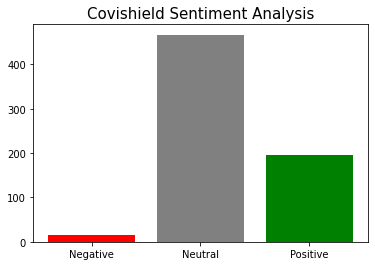

In [15]:
#visualizes the data through a bar chart

x_axis = df_covishield.groupby('Score').count().index.values
y_axis = df_covishield.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covishield Sentiment Analysis", fontsize = '15')
plt.show()

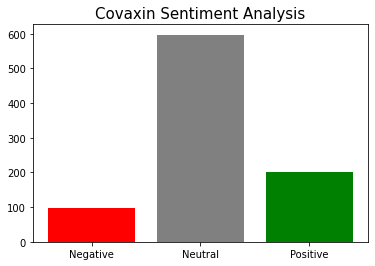

In [16]:
#visualizes the data through a bar chart
x_axis = df_covaxin.groupby('Score').count().index.values
y_axis = df_covaxin.groupby('Score').size().values
plt.bar(x_axis, y_axis, color = ['red', 'grey', 'green'])
plt.title(label = "Covaxin Sentiment Analysis", fontsize = '15')
plt.show()

As we can see the majority of the reviews are Neutral. However, the interesting part is that Covishield has less negative sentiment compared to Covaxin, which makes sense as Covaxin is yet to complete its Phase 3 trials. (Scary, I know)

To make things more clear, let's combine these two data frames and focus on the Negative tweets. What is the general population concerned about? 

In [17]:
df_whole = df_covaxin.append(df_covishield)
df_whole.shape

(1575, 4)

In [18]:
df_whole_negative = df_whole[df_whole['Score'] == 'Negative']

(-0.5, 999.5, 599.5, -0.5)

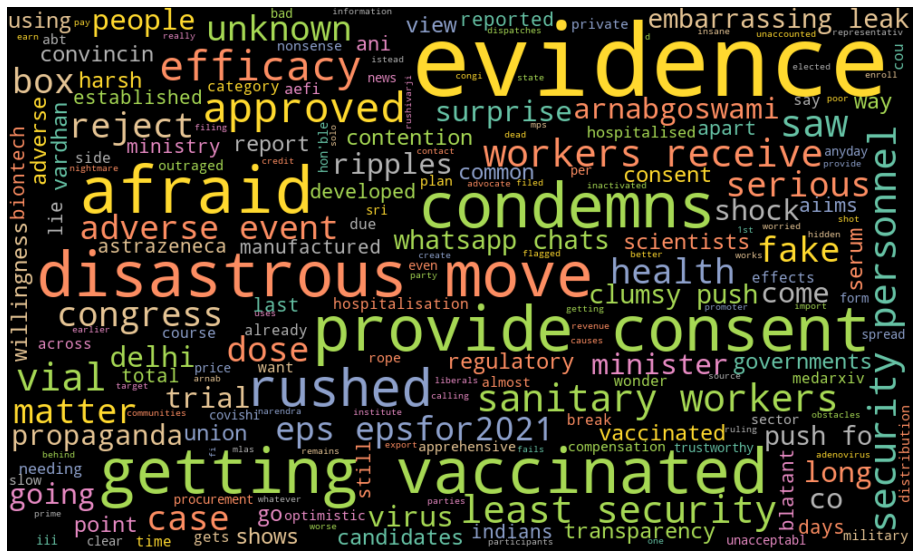

In [19]:
#whole negative

STOPWORDS.update(['india', 'friends', '2wks', '8c', 'ph3', 'vaccines','citizens', 'states', 'false', 'bjp', 'day', 'data', 'vck', 'absence', 'opposition', 'wants', 'safet', 'distributed', 'bharat', 'ignore', 'biotech', 'bharatbiotech', 'government', 'taken', 'covid', 'amp', 'take', 'vaccine', 'hammering', 'yet', 'european', 
                  'ji', 'decade', 'covaxin', 'sh', 'eg', 'pm', 'prev', 'paying', 'voice', 'govt', 'lot',
                  'tweet', 'us', 'takeaway', 'must', 'many', 'add', 'will', 'without', 'known', 'speaking',
                  'india', 'friends', 'taken', 'covid', 'based', 'take', 'S', 'example', 'lik', 'modi', 'phase',
                  't', 'decade', 'covishield', 'sh', 'rs', 'astra', 'zeneca', 'oxford', 'countries', 'pe', 'rt',
                 'indian', 'sii', 'mean', 'know', 'example link', 'hand', 'chest', 'set', 'bharat biotech'])

allWords = ' '.join([tweet for tweet in df_whole_negative['text']])
wordCloud = WordCloud(width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')


This word cloud helps us in understanding the general notion of people towards the vaccines. We can see words like afraid, rushed, disastrous move,  provide consent, adverse event, and many more. 

## Conclusion

Even though we analyzed only a small sample (~2000 tweets) of data, we still can see that the Indian Twitter population has a Neutral perception towards the vaccines, however, we cannot oversee the fact that Covaxin has a higher negative review compared to Covishield. 